# Linear regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact, FloatSlider, IntSlider

%matplotlib inline
plt.style.use('ggplot')

## With one variable

-Supervised learning (given "right answer" for each example in data  
-Regression problem (predicting a real-valued output)  

General machine learning procedure:
Training set $\rightarrow$ learning algorithm $\rightarrow h$ (hypothesis/model)  

Model implementation:
x $\rightarrow h \rightarrow$ y

Example linear model:
$h_\theta(x) = \theta_0 + \theta_1x$

$\theta_0, \theta_1$ are Parameters

In [2]:
# These are all simple versions of the functions. Optimization can be made
#  using linear algebra.

# univariate linear model
def hUnivar(x, theta0):
    return theta0*x

# bivariate linear model
def hBivar(x, theta0, theta1):
    return theta0 + theta1*x

## Cost function

Given a training set, how do you find the parameters $\theta_0, \theta_1$ so that $h_\theta(x)$ is close to y for our training examples (x, y)?

Minimize in regards to $\theta_0 \theta_1$:  
$J(\theta_0, \theta_1) =
\frac{1}{2m}\sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2$  

where i = index of training example in dataset, x = example input, y = example output, and m = number of training examples in dataset  
This is the squared error function

In [3]:
# calculates squared error of two series
def squaredError(predictY, y):
    return np.square(predictY - y)

# calculates cost between predicted and actual values
def getCost(predictYSeries, ySeries):
    m = ySeries.size
    totalError = 0
    
    for i in range(m):
        totalError += squaredError(predictYSeries.iloc[i], ySeries.iloc[i])
    
    return (1/(2*m)) * totalError

### Simple example of theta and cost relationship
In this example, a very simple hypothesis is used:   $h_\theta(x) = \theta_0x$  
As a result, the line will always intersect the y axis at the origin (0,0), and the slope will change along with $\theta_0$  

Drag the slider to change $\theta_0$. Notice how it affects the cost, calculated as the squared error in this case.

Cost:  288.185921625


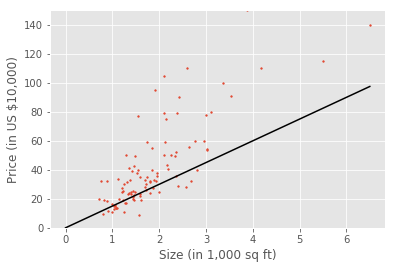

In [4]:
# load first 100 examples of house data
data = pd.read_csv('data/RealEstate.csv', usecols=['Price', 'Size']).iloc[:100]
X = data['Size']*.001
y = data['Price']*.0001

# This function is called every time t0 is changed
def updateEx1(t0):

    predictY = X.apply(hUnivar, theta0=t0)
    
    J = getCost(predictY, y)
    print("Cost: ", J)
    
    # house data examples
    plt.scatter(X, y, s=3)
    # prediction line
    plt.plot([0, X.max()], [0,predictY.max()], color='k')
    
    plt.ylim(0, y.max()) 
    plt.xlabel('Size (in 1,000 sq ft)')
    plt.ylabel('Price (in US $10,000)');
    plt.show()

interact(updateEx1, t0=FloatSlider(min=10,max=30,step=1,value=15));

## Gradient descent
So clearly we need to minimize the cost function in order to find the best parameters. But how do we do that?

Naive approach:
1. randomly choose a $\theta_0$ and $\theta_1$
2. calculate the cost, if it is the smallest cost yet, save the parameters, else forget 'em
3. start over at step 1

But that would take forever and how would we know when to stop?

Gradient descent approach:    
repeat until convergence {  
$\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta_0, \theta_1)$  (for j=0 and j=1)  
}  
$\alpha$ = learning rate  
$\frac{\partial}{\partial \theta_j} J(\theta_0, \theta_1)$ = partial derivative of $J(\theta_0, \theta_1)$

note: $\theta_0$ and $\theta_1$ must be updated *simultaneously*  
Correct simultaneous update  
temp0 $:= \theta_0 - \alpha \frac{\partial}{\partial \theta_0} J(\theta_0, \theta_1)$  
temp1 $:= \theta_1 - \alpha \frac{\partial}{\partial \theta_1} J(\theta_0, \theta_1)$  
$\theta_0 :=$ temp0  
$\theta_1 :=$ temp1

After computing the partial derivative, the gradient descent algorithm looks like this:    
$\theta_0:= \theta_0 - \alpha \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})$  
$\theta_1:= \theta_1 - \alpha \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})*x^{(i)}$  

### Choosing a learning rate
In general:  
If $\alpha$ is too small, gradient descent can be slow...  
If $\alpha$ is too large, gradient descent can overshoot the minimum, failing to converge, or even diverge  

To find a good alpha run the gradient descent and plot the cost as a function of the number of iterations.
1. If J(theta) decreases and plateaus, the learning rate is good.
2. If J(theta) increases along with number of iterations, alpha is too large
3. If J(theta) doesnt reach a plateau, alpha is too small or there were too few iterations.
Test alpha like ..., .001, .003, .01, .03, .1, .3, 1, ... 

In [5]:
def gradientDescent(X, y, theta0=0, theta1=0, alpha=.001, iterations=400):
    m = X.size
    costHistory = []
    
    for i in range(iterations):
        
        predictYSeries = X.apply(hBivar, theta0=theta0, theta1=theta1)
        costHistory.append(getCost(predictYSeries, y))
        #print((predictYSeries-ySeries)*X)
        temp0 = theta0 - alpha*(1/m)*((predictYSeries-y).sum())
        temp1 = theta0 - alpha*(1/m)*(((predictYSeries-y)*X).sum())
        
        theta0 = temp0
        theta1 = temp1
        
    return (theta0, theta1), costHistory

### Example of how theta changes in gradient descent:  
Imagine again that we are optimizing a univariate linear model like the one before, where we can only change $\theta_0$ in order to make the funciton fit closer to the data. The cost function, $J(\theta_0)$ would look something like the red parabola below. Gradient descent would only need to update our one parameter, indicated as the dot on the line. The derivative at $\theta_0$, the tangent line, is indicated by the blue line.  If the tangent is positive, $\theta_0$ will decrease, if it is negative it will increase.

Move the slider to change $\theta_0$

Derivative is positive
New theta0 will be smaller since:
    theta0 = theta0 - alpha*deriv(J(theta0))


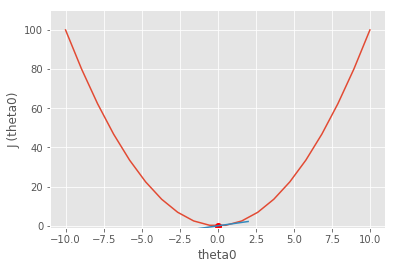

In [6]:
exampleRange = np.linspace(-10, 10, 20)
exampleJ = exampleRange**2
exampleJDeriv = np.gradient(exampleJ)

def updateEx2(t0):
    #plot J
    plt.plot(exampleRange, exampleJ)
    plt.xlabel('theta0')
    plt.ylabel('J (theta0)')
    plt.ylim(-1, 110)
    
    tempX = t0
    tempY = t0**2
    # draw the point at theta 0
    plt.plot(tempX,tempY,'ro')
    
    #calc tangent line to theta 0
    idx = 10 + t0
    slope = exampleJDeriv[idx]
    intercept = tempY - tempX*slope
    plt.plot([tempX-2, tempX+2], [(tempX-2)*slope + intercept, (tempX+2)*slope + intercept])
    
    #based on slope, should theta increase of decrease?
    if slope > 0:
        insert = ["positive", "smaller"]
    elif slope < 0:
        insert = ["negative", "larger"]
    else:
        insert = ["zero", "the same"]
    
    print("Derivative is {}\nNew theta0 will be {} since:".format(insert[0], insert[1]))
    print("    theta0 = theta0 - alpha*deriv(J(theta0))")
    
interact(updateEx2, t0=IntSlider(min=-8,max=8,step=1,value=0));

### Example of running gradient descent  
Below is gradient descent run on the housing data from before, this time using a bivariate hypothesis.

theta:  (14.435966731152828, 14.527340409945445)


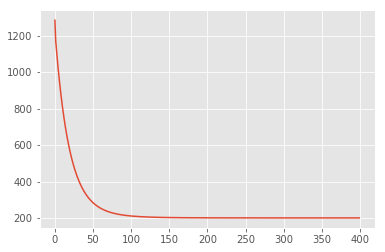

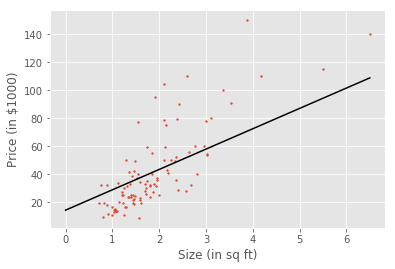

In [7]:
theta, costHistory = gradientDescent(X, y, alpha=0.01)
print("theta: ", theta)
plt.figure(0)
plt.plot(costHistory)

plt.figure(1)
# house data examples
plt.scatter(X, y, s=3)
plt.ylabel('Cost')
plt.xlabel('Iteration')

# prediction line
plt.plot([0, X.max()], [theta[0] + theta[1]*0, theta[0] + theta[1]*X.max()], color='k')
plt.ylabel('Price (in $1000)')
plt.xlabel('Size (in sq ft)')
plt.show()

# Linear regression w/ multiple variables

### Hypothesis
Previous hypothesis (one variable): $h_\theta(x) = \theta_0 + \theta_1x$  

Hypothesis for linear model with multiple variables:  
$h_\theta(x) = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n$    
where n=the number of variables (features)


Simplified expression:  
given  
$x = \begin{bmatrix}
    x_0 \\
    x_1 \\
    x_2 \\
    ... \\
    x_n
\end{bmatrix}$
$\theta = \begin{bmatrix}
    \theta_0 \\
    \theta_1 \\
    \theta_2 \\
    ... \\
    \theta_n
\end{bmatrix}$  
where $x_0^{(i)} = 1$  
    $\downarrow$  
$h_\theta(x) = \theta_0x_0 + \theta_1x_1 + ... + \theta_nx_n = \color{blue}{\theta^Tx}$

### Parameters
$\theta_0,\theta_1,\theta_2,...,\theta_n$

### Cost function
$J(\theta_0,\theta_1,...,\theta_n) = J(\theta) = 
\frac{1}{2m}\sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2$  

### Gradient descent
repeat until convergence: {  
$\theta_j := \theta_j - \alpha \frac{\partial}{\partial\theta_j} J(\theta)$  
}  
simultaneously update for every j = 0, ..., n  

After the partial derivative, you get  
repeat until convergence: {  
$\theta_j:= \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)}$  
}

### Features
#### Scaling
Every feature should be fit into approximately $-1\leq x_{(i)} \leq 1$ or $-0.5\leq x_{(i)} \leq 0.5$  
one way to do this is mean normalization:  
$x_i := \frac{x_i - \mu_i}{s_i} $  
where $\mu_i$ is the average of all the values for feature (i) and $s_i$ is the range of values (max-min)

#### New Features
You can create new features by combining ones you already have, for example, if you were looking at house info to predict its selling price, and you had the property's width and depth, you could combine these two features into one, area.  

#### Polynomial regression
The hypothesis does NOT have to be linear! For example, if a quadratic function fits it better, you can create a new feature. By doing so, you can still use the same hypothesis format. Remember to scale these new features

## Normal equation, an alternative to gradient descent

$\color{blue}{\theta = (X^T X)^{-1} X^Ty}$

Given $m$ examples $(x^{(1)},y^{(1)}), ..., (x^{(m)},y^{(m)}); n$ features.

$x^{(i)} = \begin{bmatrix}
    x_0^{(i)} \\
    x_1^{(i)} \\
    x_2^{(i)} \\
    ... \\
    x_n^{(i)}
\end{bmatrix}$
(remember that $x_0^{(i)} = 1$)

$X = \begin{bmatrix}
    --- (x^{(1)})^T --- \\
    --- (x^{(2)})^T --- \\
       ... \\
    --- (x^{(m)})^T --- \\
\end{bmatrix}$

$y = \begin{bmatrix}
    y^{(1)} \\
    y^{(2)} \\
    y^{(3)} \\
    ... \\
    y^{(m)}
\end{bmatrix}$

### When to use normal equation vs gradient descent?
Gradient descent:
- con: need to choose alpha
- con: needs many iterations
- con: need to scale features
- pro: works well even when n is large
- $O(kn^2)$ needed to calculate

Normal equation:
- pro: no need to choose alpha
- pro: no need to iterate
- pro: no need to scale features
- con: need to compute $(X^T X)^{-1}$, which is slow if n is very large
- $O(n^3)$ needed to calculate $(X^T X)^{-1}$

In general:  
- if n > 10,000 use gradient descent
- if n < 10,000 use normal equation

### What if $X^TX$ is non-invertable?
It's probably because
1. there are redundant features (linearly dependent)
 - remove the redundant stuff
2. there are too many features ($m \leq n$)
 - delete some features or use regularization

In [8]:
# Normal equation
def normalEq(X, y):
    #X: training examples;
    #   an mxn numpy matrix where x0=1 for all x's
    #y: target value
    #   an m-dimensional vector
    
    invXtX = np.linalg.pinv(X.transpose().dot(X))
    theta = invXtX.dot(X.transpose()).dot(y)
    
    return theta    

In [9]:
# test with normal equation
numpyX = np.matrix([np.ones(X.size), X.as_matrix()]).transpose()
numpyy = y.as_matrix()
theta = normalEq(numpyX, numpyy)

theta:  [[ -5.75405774  25.35612798]]
Cost after normal equation: 151.06825099176964


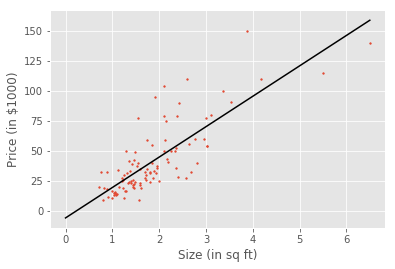

In [10]:
predictedY = hBivar(X, theta[0,0], theta[0,1])
print("theta: ", theta)
print("Cost after normal equation: {}".format(getCost(predictedY, y)))

# house data examples
plt.scatter(X, y, s=3)
plt.ylabel('Cost')
plt.xlabel('Iteration')

# prediction line
plt.plot([0, X.max()], [theta[0,0] + theta[0,1]*0, theta[0,0] + theta[0,1]*X.max()], color='k')
plt.ylabel('Price (in $1000)')
plt.xlabel('Size (in sq ft)')
plt.show()

## Optimized and Generalized

Below are my functions which use linear algebra to speed things up.

In [11]:
# hypothesis
def h(X, theta):
    # X:
    #   training examples
    #   an mxn numpy matrix where x0=1 for all x's
    # theta:
    #   hypothesis parameters
    #   an n-dimensional vector

    if X.shape[1] != theta.shape[0]:
        raise AttributeError("ERROR")
    return X.dot(theta)

# cost function
def J(X, y, theta):
    m = X.shape[0]
    predictedY = h(X, theta)
    
    return 1/(2*m)*np.sum(np.square(predictedY-y))

# partial derivative of cost function
def dJ(X, y, theta):
    predictedY = h(X, theta)
    cost = J(X, y, theta)
    
    # adjust y (for some reason subtraction was not working properly)
    y = np.matrix(y).transpose() 
    
    derivJ = X.transpose().dot(predictedY-y)
    return derivJ, cost

# gradient descent
def gradDesc(X, y, initialTheta, alpha=0.01, iterations=400):
    m = X.shape[0]
    costHistory = []
    #print("initialy", y.shape)
    theta = initialTheta
    for i in range(iterations):
        derivJ, cost = dJ(X, y, theta)
        costHistory.append(cost)
        
        theta = theta - alpha*(1/m)*derivJ
    
    return theta, costHistory

theta:  [[  6.52606116]
 [ 16.96787466]]


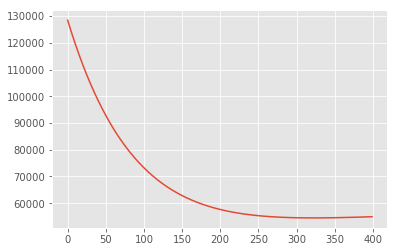

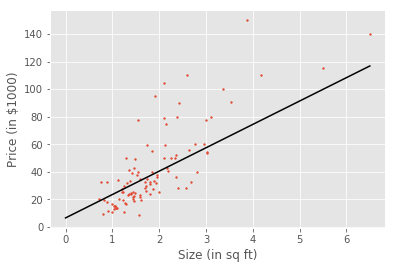

In [12]:
gdTheta, costHistory = gradDesc(numpyX, numpyy, np.matrix([[0], [0]]), alpha=.001)

print("theta: ", gdTheta)
plt.figure(0)
plt.plot(costHistory)

plt.figure(1)
# house data examples
plt.scatter(X, y, s=3)
plt.ylabel('Cost')
plt.xlabel('Iteration')

# prediction line
plt.plot([0, X.max()], [gdTheta[0,0] + gdTheta[1,0]*0, gdTheta[0,0] + gdTheta[1,0]*X.max()], color='k')
plt.ylabel('Price (in $1000)')
plt.xlabel('Size (in sq ft)')
plt.show()